### Dummy Variables

You saw in the earlier notebook that you weren't able to directly add a categorical variable to your multiple linear regression model. In this notebook, you will get some practice incorporating categorical data by converting to dummy variables in your models and interpreting the output.

Let's start by reading in the necessary libraries and data.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` Use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) documentation to assist you with obtaining dummy variables for the **neighborhood** column.  Then use [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) to add the dummy variables to your dataframe, **df**, and store the joined results in **df_new**.

Fit a linear model using **all three levels** of **neighborhood** to predict the price. Don't forget an intercept.

Use your results to answer quiz 1 below.

In [5]:
neighborhood = pd.get_dummies(df['neighborhood'])
df2 = df.join(neighborhood)
df2['intercept'] = 1
df2.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,intercept
0,1112,B,1188,3,2,ranch,598291,0,1,0,1
1,491,B,3512,5,3,victorian,1744259,0,1,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,1
3,3525,A,1940,4,2,ranch,493675,1,0,0,1
4,5108,B,2208,6,4,victorian,1101539,0,1,0,1


In [7]:
mod = sm.OLS(df2['price'], df2[['A','B', 'C', 'intercept']])
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:46:51   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B

`2.`  Now, fit an appropriate linear model for using **neighborhood** to predict the price of a home. Use **neighborhood A** as your baseline. (And remember that the values shown in the results for the other neighborhoods will be based on comparisons with this baseline neighborhood A then.) Use your resulting model to answer the questions in Quiz 2 and Quiz 3 below.

In [8]:
mod = sm.OLS(df2['price'], df2[['B', 'C', 'intercept']])
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:49:53   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C

`3.` Run the two cells below to look at the home prices for the A and C neighborhoods. Add neighborhood B. This creates a glimpse into the differences that you found in the previous linear model.

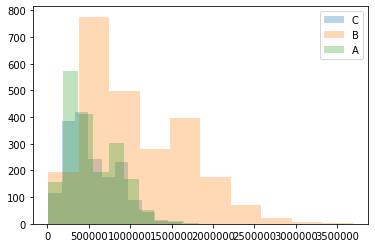

In [11]:
plt.hist(df2.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df2.query("B == 1")['price'], alpha = 0.3, label = 'B');
plt.hist(df2.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

`4.` Now, add dummy variables for the **style** of house. Create a new linear model using these new dummies, as well as the previous **neighborhood** dummies.  Use **ranch** as the baseline for the **style**.  Additionally, add **bathrooms** and **bedrooms** to your linear model.  Don't forget an intercept.  Use the results of your linear model to answer the last two questions below. **Home prices are measured in dollars, and this dataset is not real.**

To minimize scrolling, it might be useful to open another browser window to this concept to answer the quiz questions.

In [13]:
style = pd.get_dummies(df2['style'])
df3 = df2.join(style)
df3.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,intercept,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0,1,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0,1,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0,1,0,0,1


In [16]:
mod = sm.OLS(df3['price'], df3[['B', 'C', 'lodge','victorian', 'bathrooms', 'bedrooms', 'intercept']])
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C